> # DECISION TREES - 1 - GINI INDEX

## Import the libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'ads.csv')

In [3]:
data.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


## Exploratory Data Analysis


In [4]:
data.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
data.drop(['User ID'],axis=1,inplace=True)

In [6]:
data.isna().any()

Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

## Store the value of the feature and the predicting column in seperate arrays

In [7]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

## Split into training and testing set

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=0)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Fit the data into the model

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(x_train,y_train)

DecisionTreeClassifier()

## Predict the values

In [11]:
y_pred = clf.predict(x_test)

In [12]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

## Confusion Matrix, Accuracy Score and Classification Report

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test,y_pred)

array([[62,  6],
       [ 5, 27]], dtype=int64)

In [14]:
accuracy_score(y_test,y_pred)*100

89.0

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        68
           1       0.82      0.84      0.83        32

    accuracy                           0.89       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.89      0.89      0.89       100



> # DECISION TREES - 2 - ENTROPY

## Import the libraries and read the dataset

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv(r'car_evaluation.csv')

## Print the values

In [18]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## Exploratory data analysis

In [19]:
data.shape

(1727, 7)

#### Rename column names

In [20]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [22]:
data.isna().any()

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
class       False
dtype: bool

#### No null values

In [23]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [24]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [25]:
data.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


## Declare feature vector and target variable

In [26]:
x = data.drop(['class'], axis=1)
y = data['class']

## Feature Engineering 

In [27]:
data.isnull().any()

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
class       False
dtype: bool

In [28]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [29]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


#### Encoding

In [33]:
# !pip install --upgrade category_encoders

In [34]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x = encoder.fit_transform(x)

In [35]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


 ## Split data into separate train and test set

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [37]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((1208, 6), (1208,), (519, 6), (519,))

 ##  Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

 ## Predict results

In [39]:
y_pred = clf.predict(x_test)

 ## Check accuracy score

In [40]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.8015


> ## Check for overfitting and underfitting

In [41]:
print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Training set score: 0.7873
Test set score: 0.8015


### We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7873 while the test-set accuracy to be 0.8015. These two values are quite comparable. So, there is no sign of overfitting.

> ## Visualize decision-trees

[Text(0.6, 0.875, 'X[5] <= 2.5\nentropy = 1.203\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.4, 0.625, 'X[3] <= 1.5\nentropy = 1.484\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.6, 0.375, 'X[0] <= 2.5\nentropy = 1.642\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.4, 0.125, 'entropy = 0.995\nsamples = 280\nvalue = [128, 0, 152, 0]'),
 Text(0.8, 0.125, 'entropy = 1.756\nsamples = 267\nvalue = [138, 52, 35, 42]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

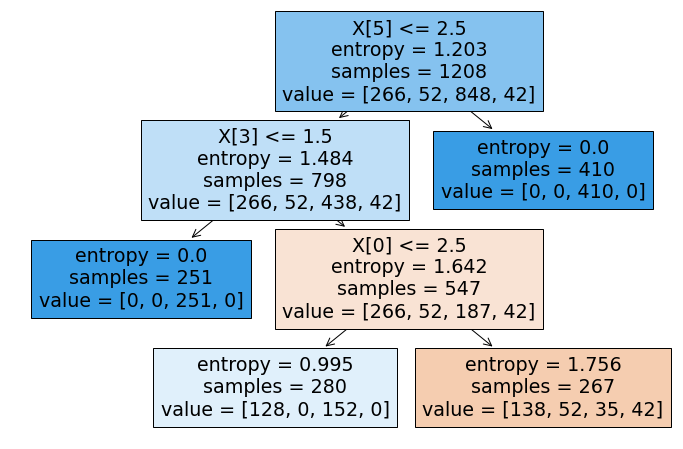

In [45]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(x_train, y_train),filled=True) 

> ## Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 66   0  52   0]
 [ 17   0   0   0]
 [ 11   0 350   0]
 [ 23   0   0   0]]


 ## Classification Report

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       118
        good       0.00      0.00      0.00        17
       unacc       0.87      0.97      0.92       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.80       519
   macro avg       0.36      0.38      0.37       519
weighted avg       0.73      0.80      0.77       519



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
